In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage

## https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html

<h1> Load countries data

In [102]:
df = pd.read_csv('../dataset/Country-data.csv', sep=',', decimal='.')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h1> Check data

In [103]:
df.shape

(167, 10)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [105]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h1> Checking dataset value range

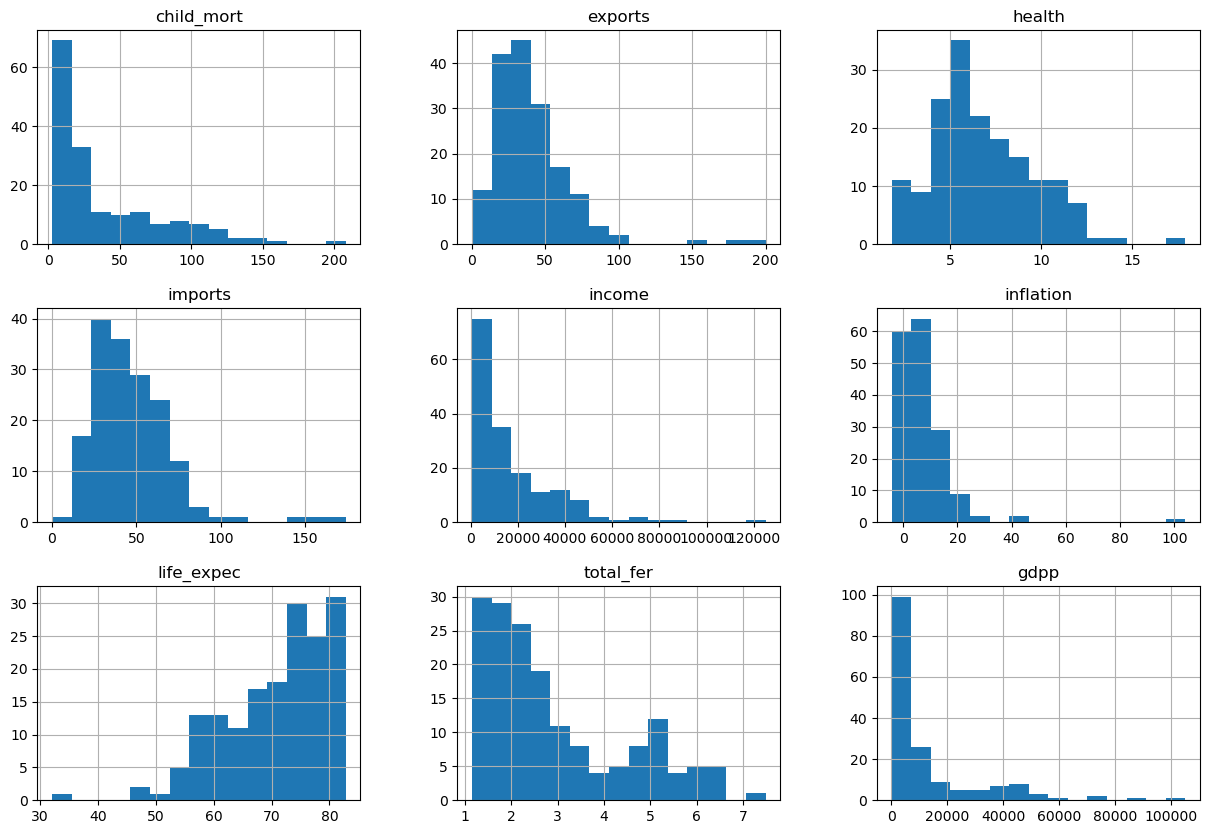

In [106]:
df.hist(figsize=(15, 10), bins=15)
plt.show()

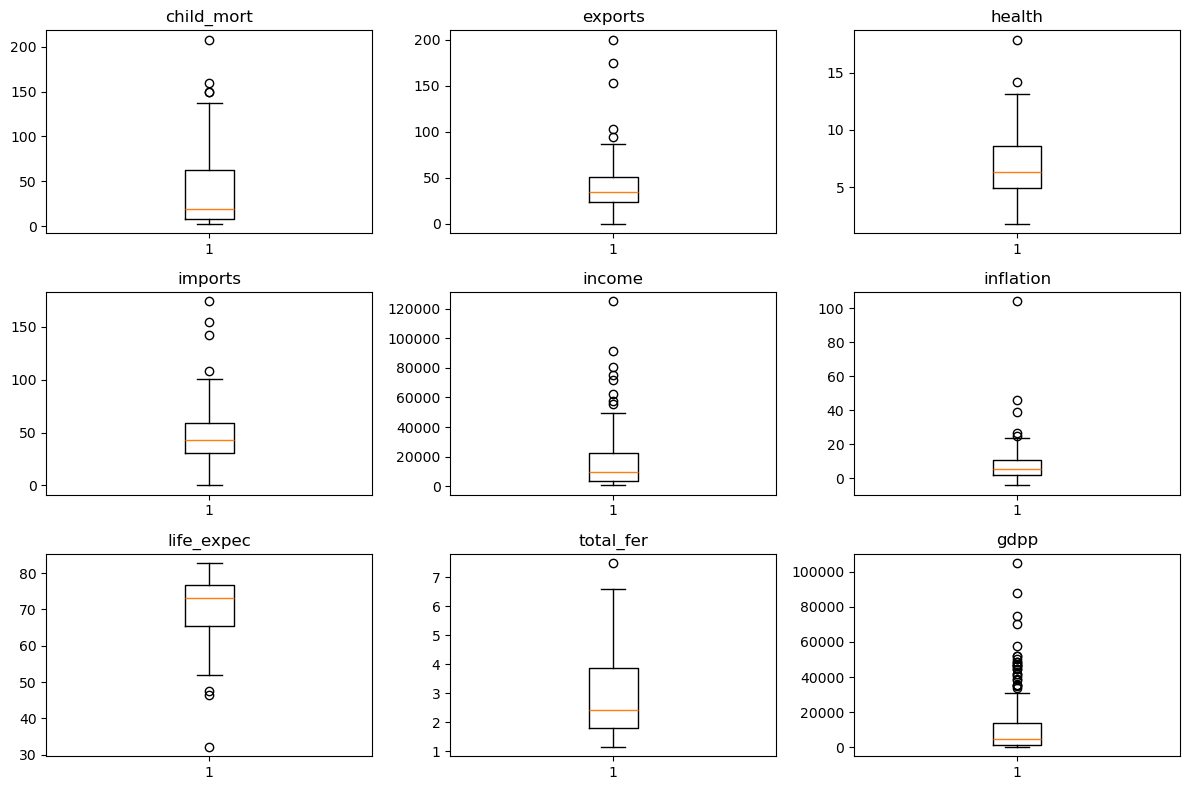

In [107]:
num_cols = df.select_dtypes(include=['number']).columns

num_cols = df.select_dtypes(include=['number']).columns
num_plots = len(num_cols)  # Get the number of numerical columns

rows = (num_plots // 3) + (num_plots % 3 > 0)  # Integer division and remainder check
cols = min(3, num_plots)  # Ensure at most 3 columns

# # Create the figure and subplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

<h1> Prepare dataset

In [108]:

features = df.drop(['country'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [109]:
k_cluster = 3
kmeans = KMeans(n_clusters=k_cluster,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, y_kmeans)
print(f"Silhouette Score for k:{k_cluster} = {silhouette_avg}")
y_kmeans

Silhouette Score for k:3 = 0.28329575683463126


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [110]:
kmeans_countries_df = df.copy()
kmeans_countries_df['cluster'] = kmeans.labels_
kmeans_countries_df[['country', 'cluster']].head(10)

,country,cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,2
8,Austria,2
9,Azerbaijan,0


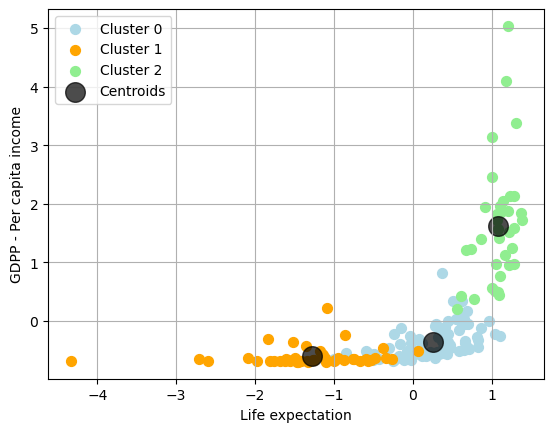

In [111]:
centers = kmeans.cluster_centers_

# Cluster colors
colors = ['lightblue', 'orange', 'lightgreen']

# Plot each cluster with a specific color and label
for cluster in range(k_cluster):
    plt.scatter(scaled_data[y_kmeans == cluster, 6], scaled_data[y_kmeans == cluster, 8], 
                color=colors[cluster], s=50, label=f'Cluster {cluster}')

plt.xlabel('Life expectation')
plt.ylabel('GDPP - Per capita income')

# Plot centroids
plt.scatter(centers[:, 6], centers[:, 8], c='black', s=200, alpha=0.7, label='Centroids')

# Display the legend
plt.legend()
plt.grid(True)
plt.show()

In [117]:
closest, _ = pairwise_distances_argmin_min(centers, scaled_data)

# Get countries that are closest to centroids
closest_countries = kmeans_countries_df.iloc[closest]['country'].tolist()
print('Countries closest to centroid:')
for country in closest_countries:
  value = kmeans_countries_df.loc[kmeans_countries_df['country'] == country]
  print(value)


Countries closest to centroid:
    country  child_mort  exports  health  imports  income  inflation  \
76  Jamaica        18.1     31.3    4.81     49.6    8000       9.81   

    life_expec  total_fer  gdpp  cluster  
76        74.7       2.17  4680        0  
   country  child_mort  exports  health  imports  income  inflation  \
63  Guinea       109.0     30.3    4.93     43.2    1190       16.1   

    life_expec  total_fer  gdpp  cluster  
63        58.0       5.34   648        1  
    country  child_mort  exports  health  imports  income  inflation  \
68  Iceland         2.6     53.4     9.4     43.3   38800       5.47   

    life_expec  total_fer   gdpp  cluster  
68        82.0        2.2  41900        2  


Silhouette Score for K=3: 0.2833


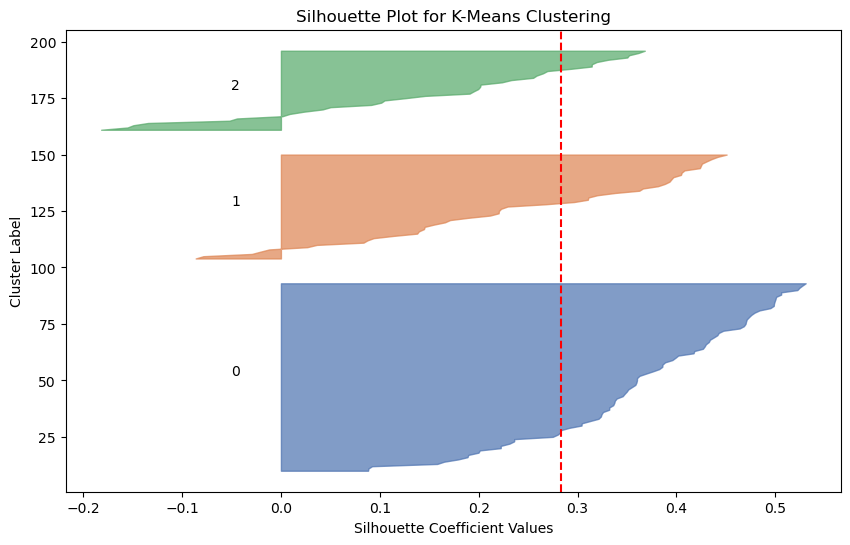

In [113]:
# Calculate Silhouette Score for the optimal K
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for K={k_cluster}: {silhouette_avg:.4f}')

# Detailed Silhouette Analysis
sample_silhouette_values = silhouette_samples(scaled_data, kmeans.labels_)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(k_cluster):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = sns.color_palette("deep")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

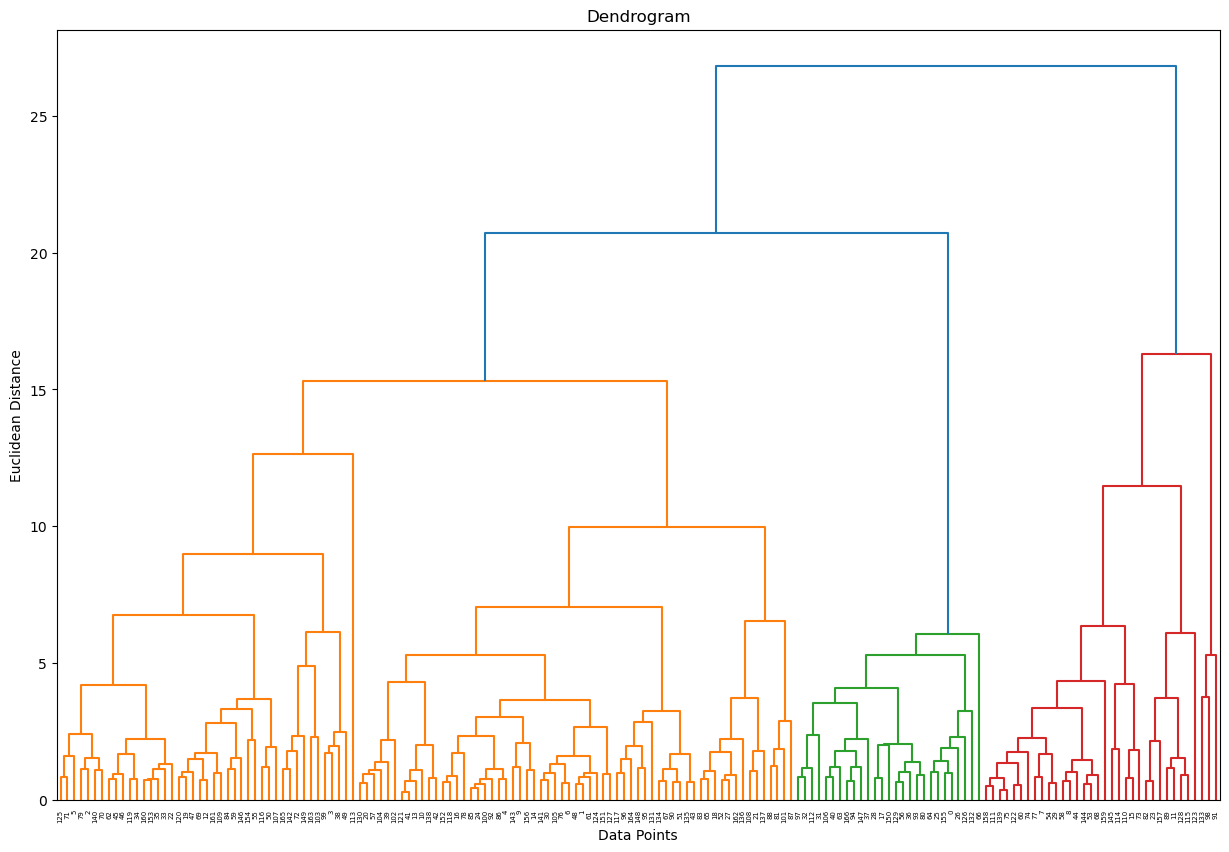

In [114]:
linked = linkage(scaled_data, method='ward')  # 'ward' minimize variance

# Plot dendogram
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

<h1> KMedoids